# Title: Study of Host Galaxy Properties of Short Gamma Ray Bursts

Project By-:


* Shubh Mittal (MSC23416)
* Srishti Sharma (MSC23411)
* Ruchi Arya (IMS21290)





In [ ]:
import numpy as np
import scipy
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:



%matplotlib inline
# Imports
import json
from astropy.io import fits
from pandas import read_csv
from astropy.coordinates import SkyCoord
import matplotlib
import glob
from astropy import units as u
from astropy.coordinates import SkyCoord
import os


matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['axes.linewidth'] = 2.



## Extracting data from JSON files


---



In [ ]:
path = 'json/'
json_files = glob.glob(path + '*.json', recursive = True)
print(json_files)  # should show a list of paths like ["folder/GRB170127B.json", ...]

['json/GRB160624A.json', 'json/GRB200219A.json', 'json/GRB160525B.json', 'json/GRB051210.json', 'json/GRB050724.json', 'json/GRB070729.json', 'json/GRB130912A.json', 'json/GRB061210.json', 'json/GRB061201.json', 'json/GRB180618A.json', 'json/GRB170817.json', 'json/GRB060121.json', 'json/GRB170728A.json', 'json/GRB130716A.json', 'json/GRB060313.json', 'json/GRB070429B.json', 'json/GRB181123B.json', 'json/GRB210919A.json', 'json/GRB150728A.json', 'json/GRB150423A.json', 'json/GRB161104A.json', 'json/GRB160601A.json', 'json/GRB170728B.json', 'json/GRB080123.json', 'json/GRB140930B.json', 'json/GRB070724.json', 'json/GRB060801.json', 'json/GRB170428A.json', 'json/GRB110112A.json', 'json/GRB180805B.json', 'json/GRB090510.json', 'json/GRB210323A.json', 'json/GRB210726A.json', 'json/GRB200522A.json', 'json/GRB081226A.json', 'json/GRB101224A.json', 'json/GRB200907B.json', 'json/GRB100117.json', 'json/GRB070809.json', 'json/GRB100206A.json', 'json/GRB071227.json', 'json/GRB120804A.json', 'json/

## Converting JSON data to CSV

In [ ]:
import json
import pandas as pd
import glob

data = []

# Fields to exclude
exclude_keys = {
    "phot", "phot_err", "filters", "telescopes", "phot_refs",
    "spec", "spec_tel", "spec_ref", "mod_phot", "mod_spec",
    "FITS", "corner", "SED", "color", "H5", "afterglow"
}

for file in json_files:
    with open(file, 'r') as f:
        try:
            d = json.load(f)
            # Flatten only allowed keys
            row = {"GRB": os.path.basename(file).replace(".json", "")}
            for k, v in d.items():
                if k not in exclude_keys and not isinstance(v, list) and not isinstance(v, dict):
                    row[k] = v
            data.append(row)
        except Exception as e:
            print(f"Error reading {file}: {e}")

# Convert to DataFrame and save
df = pd.DataFrame(data)
df.to_csv("all_GRB_hosts.csv", index=False)
print("CSV created: all_GRB_hosts.csv")



CSV created: all_GRB_hosts.csv


## Data loading
Load the data from the provided CSV file into a pandas DataFrame.


In [ ]:
import pandas as pd

try:
    df_1 = pd.read_csv('all_GRB_hosts.csv')
    display(df_1.head())
    print(df_1.shape)
except FileNotFoundError:
    print("Error: 'grb_table_data.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,GRB,type_GRB,RA_host,Dec_host,tel_pos,tel_pos_ref,host_morphology,host_SF,T90,fluence,...,SFR_err_upper,SFR_err_lower,dust2,dust2_err_upper,dust2_err_lower,dust1,dust1_err_upper,dust1_err_lower,comments,GCN
0,GRB160624A,short,22:00:46.145,+29:38:39.336,UKIRT/WFCAM,BRIGHT,NaN,Star-forming,0.20,4.0,...,1.09,-0.44,0.55,0.38,-0.30,NaN,NaN,NaN,Spectroscopically determined redshift,https://gcn.gsfc.nasa.gov/other/160624A.gcn3
1,GRB200219A,short,22:50:33.108,-59:07:11.579,Legacy Survey DR9,Legacy Survey DR9,NaN,Star-forming,288.00,74.0,...,1.86,-1.26,0.96,0.07,-0.06,NaN,NaN,NaN,Photometric redshift determined through Prospe...,https://gcn.gsfc.nasa.gov/other/200219A.gcn3
2,GRB160525B,short,9:57:32.246,+51:12:24.60,Keck/LRIS,BRIGHT,NaN,Star-forming,0.29,3.2,...,23.20,-0.87,0.14,0.19,-0.09,NaN,NaN,NaN,Unknown redshift.,https://gcn.gsfc.nasa.gov/other/160525B.gcn3
3,GRB051210,short,22:00:40.942,-57:36:47.063,HST/WFPC2,Fong 2010,Unknown,Star-forming,1.30,8.5,...,2520.10,-367.89,1.90,1.01,-0.92,NaN,NaN,NaN,Photometric redshift from Prospector.,https://gcn.gsfc.nasa.gov/other/051210.gcn3
4,GRB050724,short,16:24:44.410,-27:32:26.393,HST/WFPC2,Fong 2010,Elliptical,Quiescent,98.00,99.8,...,0.01,-0.01,0.76,0.04,-0.04,NaN,NaN,NaN,Spectroscopically determined redshift.,https://gcn.gsfc.nasa.gov/other/050724.gcn3


(93, 56)


## Data Filteration: Dropping rows which don't have one of the specified values.

In [ ]:
import pandas as pd

# Load the original data
df = pd.read_csv('all_GRB_hosts.csv')

# Specify the columns to check for missing values
columns_to_check = ['z', 'mass', 'age', 'SFR']

# Filter out rows with missing values in any specified column
df_filtered = df.dropna(subset=columns_to_check)

# Save the updated filtered data to the filtered file
df_filtered.to_csv('all_GRB_hosts_filtered.csv', index=False)

In [ ]:
df_filtered = pd.read_csv('all_GRB_hosts_filtered.csv')

display(df_filtered)

,GRB,type_GRB,RA_host,Dec_host,tel_pos,tel_pos_ref,host_morphology,host_SF,T90,fluence,...,SFR_err_upper,SFR_err_lower,dust2,dust2_err_upper,dust2_err_lower,dust1,dust1_err_upper,dust1_err_lower,comments,GCN
0,GRB160624A,short,22:00:46.145,+29:38:39.336,UKIRT/WFCAM,BRIGHT,NaN,Star-forming,0.200,4.0,...,1.09,-0.44,0.55,0.38,-0.30,NaN,NaN,NaN,Spectroscopically determined redshift,https://gcn.gsfc.nasa.gov/other/160624A.gcn3
1,GRB200219A,short,22:50:33.108,-59:07:11.579,Legacy Survey DR9,Legacy Survey DR9,NaN,Star-forming,288.000,74.0,...,1.86,-1.26,0.96,0.07,-0.06,NaN,NaN,NaN,Photometric redshift determined through Prospe...,https://gcn.gsfc.nasa.gov/other/200219A.gcn3
2,GRB160525B,short,9:57:32.246,+51:12:24.60,Keck/LRIS,BRIGHT,NaN,Star-forming,0.290,3.2,...,23.20,-0.87,0.14,0.19,-0.09,NaN,NaN,NaN,Unknown redshift.,https://gcn.gsfc.nasa.gov/other/160525B.gcn3
3,GRB051210,short,22:00:40.942,-57:36:47.063,HST/WFPC2,Fong 2010,Unknown,Star-forming,1.300,8.5,...,2520.10,-367.89,1.90,1.01,-0.92,NaN,NaN,NaN,Photometric redshift from Prospector.,https://gcn.gsfc.nasa.gov/other/051210.gcn3
4,GRB050724,short,16:24:44.410,-27:32:26.393,HST/WFPC2,Fong 2010,Elliptical,Quiescent,98.000,99.8,...,0.01,-0.01,0.76,0.04,-0.04,NaN,NaN,NaN,Spectroscopically determined redshift.,https://gcn.gsfc.nasa.gov/other/050724.gcn3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,GRB130515A,short,18:53:45.021,-54:16:50.72,Magellan/LDSS,BRIGHT,Unknown,Transitioning,0.290,15.0,...,0.23,-0.09,0.14,0.09,-0.08,NaN,NaN,NaN,"Photometric redshift from Prospector, no trace...",https://gcn.gsfc.nasa.gov/other/130515A.gcn3
67,GRB200411A,short,3:10:39.135,-52:18:59.545,Legacy Survey DR9,Legacy Survey DR9,NaN,Star-forming,0.220,8.6,...,21.94,-15.21,1.52,0.54,-0.42,NaN,NaN,NaN,Photometric redshift determined through Prospe...,https://gcn.gsfc.nasa.gov/other/200411A.gcn3
68,GRB150120A,short,00:41:16.563,+33:59:42.598,LBT/LBC,BRIGHT,NaN,Star-forming,1.200,14.0,...,0.92,-0.66,1.10,0.23,-0.24,NaN,NaN,NaN,Spectroscopically determined redshift,https://gcn.gsfc.nasa.gov/other/150120A.gcn3
69,GRB150101B,short,12:32:04.973,−10:56:00.50,Magellan/IMACS,Fong 2016,NaN,Quiescent,0.018,2.3,...,0.02,-0.02,0.25,0.02,-0.02,NaN,NaN,NaN,Spectroscopically determined redshift.,https://gcn.gsfc.nasa.gov/other/150101B.gcn3


## Categorizing host galaxies into Star-forming, Transistioning and Quiescent.

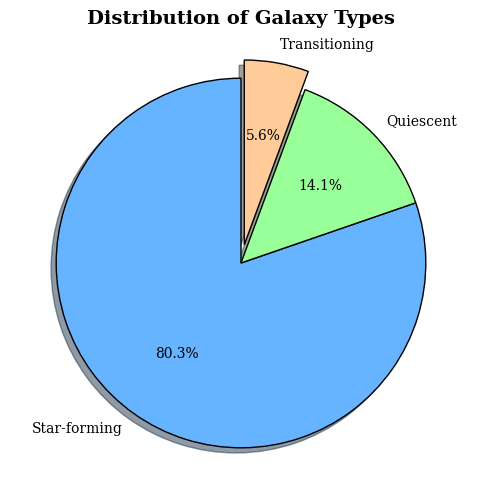

In [ ]:
#  Data loading
df = pd.read_csv("all_GRB_hosts_filtered.csv")

# Count the frequency of each category in host_SF
host_type_counts = df['host_SF'].value_counts(dropna=True)

# Pie chart
plt.figure(figsize=(6, 6))

# Define colors for each slice
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#98cc99']  # Example colors

explode = (0, 0,0.1)  # Explode the third slice

# Create the pie chart
plt.pie(host_type_counts, labels=host_type_counts.index, autopct='%1.1f%%',
        startangle=90, explode=explode, colors=colors, shadow=True,
        wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Galaxy Types', fontsize=14, fontweight='bold')
plt.show()

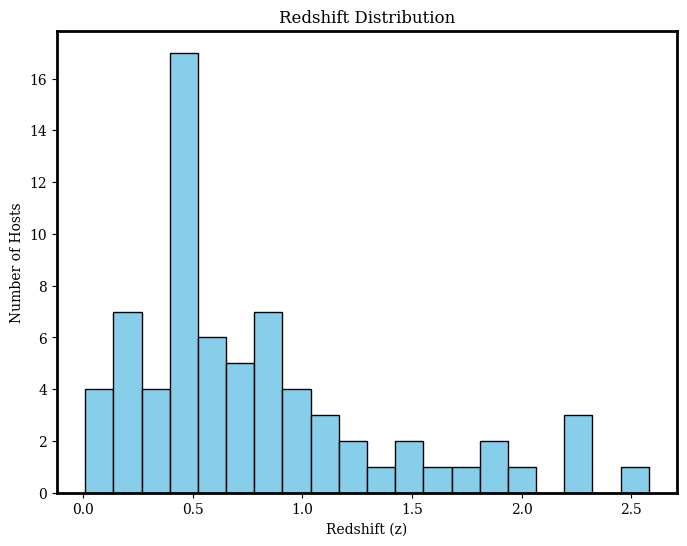

In [ ]:
# Redshift Histogram

plt.figure(figsize=(8, 6))
plt.hist(df['z'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Redshift Distribution')
plt.xlabel('Redshift (z)')
plt.ylabel('Number of Hosts')
plt.show()


### Dividing the sample into Gold, Silver and Bronze on the basis of Pcc value which tells the chances of association of detected sGRB with the host galaxy.

In [ ]:
'''Medians of gold, silver and bronze samples'''

import pandas as pd
import numpy as np

df = pd.read_excel('all_GRB_hosts_filtered.xlsx')

print("Columns available:\n", df.columns.tolist())

# Mass-weighted age in Gyr (paper calls this t_m)
df['tm'] = df['age']

# Stellar mass as log10(M*/M_sun)
df['logMstar'] = df['mass']

# Star formation rate (M_sun/yr)
df['SFR'] = df['SFR']

# Specific SFR (yr^-1) and its log
# sSFR = SFR / M*, where M* = 10**(logMstar)
df['sSFR'] = df['SFR'] / (10 ** df['logMstar'])

# avoid taking log10(0)
df['logsSFR'] = np.log10(df['sSFR'].replace(0, np.nan))

# Stellar metallicity log(Z*/Z_sun)
df['logZstar'] = df['logzsol']

# 4. Categorize each host by its Pcc value
def categorize_pcc(pcc):
    if pcc <= 0.02:
        return 'Gold'
    elif pcc <= 0.09:
        return 'Silver'
    else:
        return 'Bronze'

df['Category'] = df['Pcc'].apply(categorize_pcc)

# Parameters to summarize
params = ['z', 'tm', 'logMstar', 'SFR', 'logsSFR', 'logZstar']

# Group by Category and compute the median for each parameter
median_table = df.groupby('Category')[params].median().reset_index()

# Results Display
print("\nMedian values by Category:")
print(median_table.to_string(index=False))


Columns available:
 ['GRB', 'type_GRB', 'RA_host', 'Dec_host', 'tel_pos', 'tel_pos_ref', 'host_morphology', 'host_SF', 'T90', 'fluence', 'fluence_err_upper', 'fluence_err_lower', 'xray', 'opt', 'radio', 'offset', 'offset_err_upper', 'offset_err_lower', 'offset_kpc', 'offset_kpc_err_upper', 'offset_kpc_err_lower', 'offset_ref', 'Pcc', 'Pcc_ref', 'frac_flux', 'eff_rad', 'hnorm_offset', 'hnorm_offset_err', 'halflightrad', 'z', 'z_err_upper', 'z_err_lower', 'z_ref', 'mass', 'mass_err_upper', 'mass_err_lower', 'age', 'age_err_upper', 'age_err_lower', 'logzsol', 'logzsol_err_upper', 'logzsol_err_lower', 'gas_logz', 'gas_logz_err_upper', 'gas_logz_err_lower', 'SFR', 'SFR_err_upper', 'SFR_err_lower', 'dust2', 'dust2_err_upper', 'dust2_err_lower', 'dust1', 'dust1_err_upper', 'dust1_err_lower', 'comments', 'GCN']

Median values by Category:
Category     z   tm  logMstar  SFR   logsSFR  logZstar
  Bronze 1.010 0.62      9.87 6.01 -8.987088     -0.38
    Gold 0.473 0.84      9.68 1.23 -9.502482   

### Stellar Mass vs. Mass-weighted ages by Host Galaxy Type

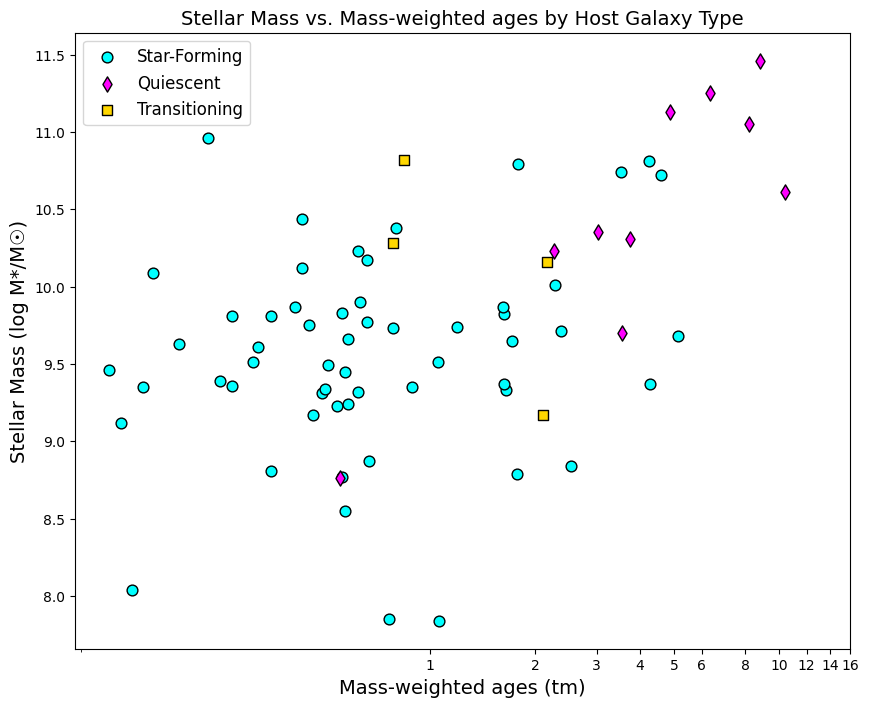

In [ ]:
import matplotlib.ticker as ticker

df = pd.read_excel("all_GRB_hosts_filtered_with_category.xlsx")

# Filter the data into three groups:
sf_df = df[df['host_SF'] == 'Star-forming']
quiescent_df = df[df['host_SF'] == 'Quiescent']
trans_df = df[df['host_SF'] == 'Transitioning']

plt.figure(figsize=(10, 8))

# Scatter plots for each sample
plt.scatter(sf_df['age'], sf_df['mass'], label='Star-Forming', marker='o', color='cyan', edgecolors='black', s=60, zorder=5)
plt.scatter(quiescent_df['tm'], quiescent_df['mass'], label='Quiescent', marker='d', color='magenta', edgecolors='black', s=60, zorder=5)
plt.scatter(trans_df['tm'], trans_df['mass'], label='Transitioning', marker='s', color='gold', edgecolors='black', s=60, zorder=5)

# Set the x-scale to symlog with a linthresh value
plt.xscale('symlog', linthresh=0.1)

# Custom x-ticks
tick_values = [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16]
plt.xticks(tick_values)

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:g}'.format(x)))

plt.xlabel("Mass-weighted ages (tm)", fontsize = 14)
plt.ylabel("Stellar Mass (log M*/M☉)", fontsize = 14)
plt.title("Stellar Mass vs. Mass-weighted ages by Host Galaxy Type", fontsize = 14)
plt.legend(fontsize = 12)
plt.show()


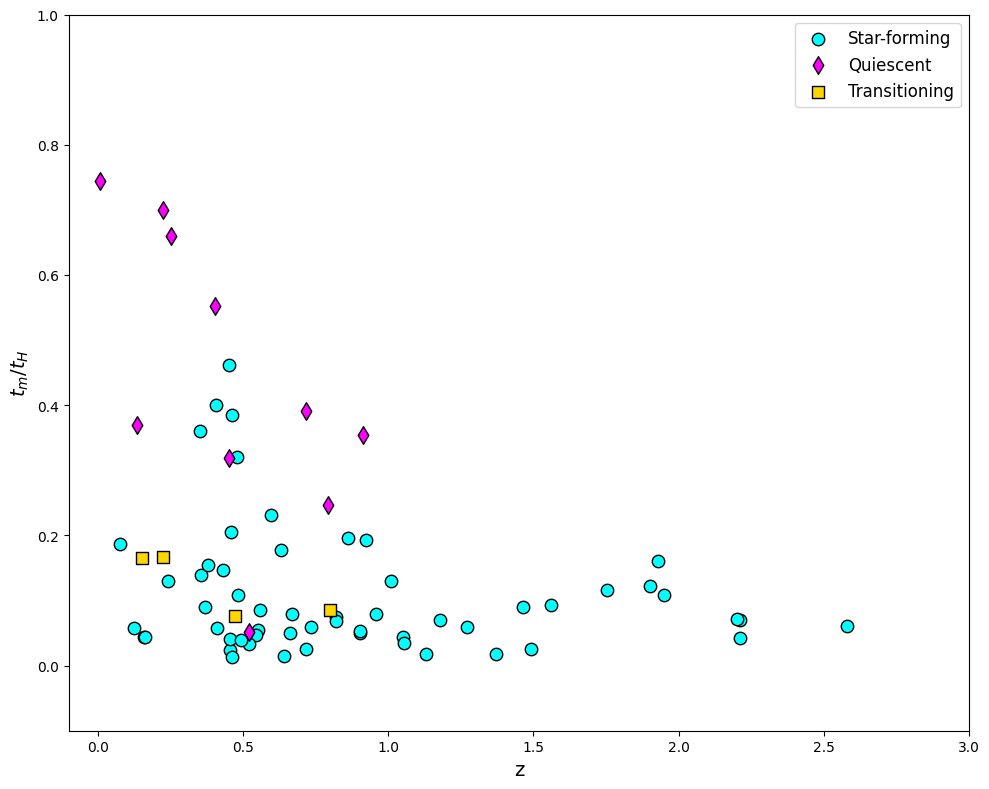

In [ ]:

df = pd.read_excel("all_GRB_hosts_filtered_with_category.xlsx")

# Constants
Ho = 69.6  # Hubble constant in km/s/Mpc
Ho_SI = Ho / (3.086e19)  # Convert H0 to s^-1
omega_m = 0.286
omega_vac = 0.714

# Calculate Hubble time for each redshift
def calc_hubble_time(z):
    Hz = Ho_SI * np.sqrt(omega_m * (1 + z)**3 + omega_vac)
    t_H_sec = 1 / Hz
    return t_H_sec / (3.154e16)  # Convert to Gyr

# Add columns for Hubble time and t_m/t_H ratio
df['t_H_Gyr'] = df['z'].apply(calc_hubble_time)
df['tm_ratio'] = df['tm'] / df['t_H_Gyr']

# Create a mapping for marker styles and colors
style_map = {
    'Star-forming': {'marker': 'o', 'color': 'cyan'},
    'Quiescent': {'marker': 'd', 'color': 'magenta'},
    'Transitioning': {'marker': 's', 'color': 'gold'}
}

# Create the plot
plt.figure(figsize=(10, 8))

# Plot each group with a single loop
for host_type, style in style_map.items():
    subset = df[df['host_SF'] == host_type]
    plt.scatter(
        subset['z'],
        subset['tm_ratio'],
        label=host_type,
        marker=style['marker'],
        color=style['color'],
        edgecolors='black',
        s=80,
        zorder=5
    )
plt.ylim(-0.1, 1.0)
plt.xlim(-0.1, 3)
plt.ylabel("$t_m/t_H$", fontsize = 14)
plt.xlabel("z", fontsize = 14)
plt.legend(fontsize = 12)
# plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Monte Carlo Simulation and Kolmogorov–Smirnov test calculation


--- Kolmogorov–Smirnov Test Results ---
Star-forming: KS stat = 0.1473, p‑value = 1.5223e-01
Quiescent/Transitioning: KS stat = 0.1727, p‑value = 7.3691e-01

SF vs QT empirical: KS stat = 0.3759, p‑value = 6.3874e-02


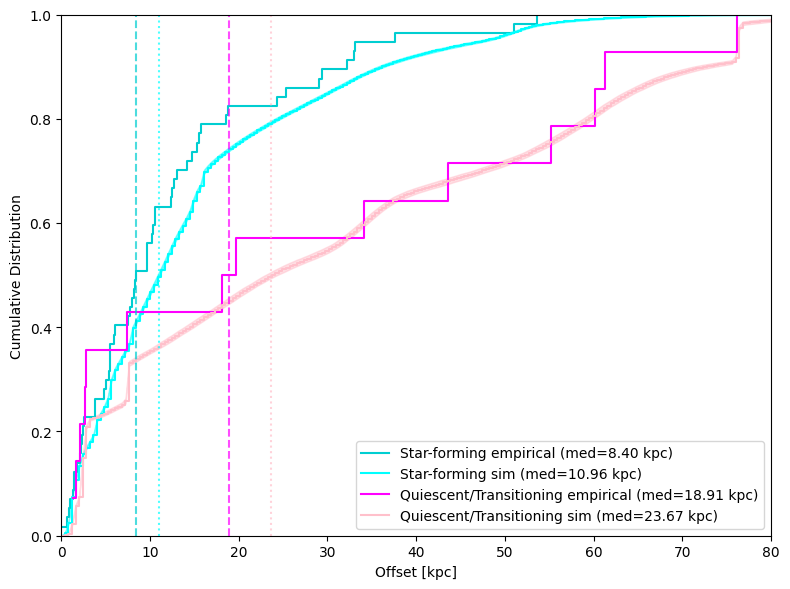

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rice, ks_2samp
from scipy import stats

def monte_carlo_simulation(df, n_samples=10000, n_iterations=100):
    """
    Monte Carlo over Rician (Rice) vs Gaussian approx with a 5σ cutoff.
    Returns:
      - results: per-point dict (first iteration only)
      - combined_samples: all simulated points (flat array)
      - iteration_samples: list of 1D arrays for each iteration
      - overall_median
    """
    results = {}
    all_samples = []
    iteration_samples = []
    draws_per_iter = n_samples // n_iterations

    for it in range(n_iterations):
        this_iter = []
        for idx, row in df.iterrows():
            R = row['R']
            sigma_r = 0.5 * (row['sigma_r_err_up'] + abs(row['sigma_r_err_low']))

            if R >= 5 * sigma_r:
                samples = np.random.normal(R, sigma_r, draws_per_iter)
                samples = np.clip(samples, 0, None)
            else:
                b = R / sigma_r if sigma_r > 0 else 0
                samples = rice.rvs(b, scale=sigma_r, size=draws_per_iter)

            if it == 0:
                results[idx] = {
                    'R': R,
                    'sigma_r': sigma_r,
                    'samples': samples,
                    'mean': np.mean(samples),
                    'median': np.median(samples)
                }
            this_iter.append(samples)

        this_iter = np.concatenate(this_iter)
        iteration_samples.append(this_iter)
        all_samples.append(this_iter)

    all_samples = np.concatenate(all_samples)
    overall_median = np.median(all_samples)
    return results, all_samples, iteration_samples, overall_median

def calculate_cdf_with_uncertainty(samples_list):
    """
    Build mean CDF ±1σ envelope on a common x_grid.
    """
    x_grid = np.linspace(0, 80, 200)
    cdf_matrix = []

    for samples in samples_list:
        sorted_s = np.sort(samples)
        y = np.arange(1, len(sorted_s)+1) / len(sorted_s)
        sorted_s = np.concatenate(([0], sorted_s, [x_grid[-1]]))
        y = np.concatenate(([0], y, [1.0]))
        cdf_matrix.append(np.interp(x_grid, sorted_s, y))

    cdf_matrix = np.vstack(cdf_matrix)
    mean_cdf = cdf_matrix.mean(axis=0)
    std_cdf  = cdf_matrix.std(axis=0)

    lower = mean_cdf - std_cdf
    upper = mean_cdf + std_cdf
    return x_grid, mean_cdf, lower, upper

def plot_combined_galaxy_type_cdfs(sf_df, qt_df):
    plt.figure(figsize=(8,6))
    style = {
        'Star-forming':           {'col':'darkturquoise','band':'cyan'},
        'Quiescent/Transitioning':{'col':'magenta',      'band':'pink'}
    }
    groups = {
        'Star-forming': sf_df,
        'Quiescent/Transitioning': qt_df
    }
    emp_medians   = {}
    rice_medians  = {}
    empirical_data = {}
    simulated_data = {}

    # 1) Plot empirical and simulated CDFs
    for label, df in groups.items():
        if df.empty:
            continue
        col = style[label]['col']

        # --- Empirical CDF ---
        x_emp = np.sort(df['offset_kpc'])
        y_emp = np.arange(1, len(x_emp)+1) / len(x_emp)
        m_emp = np.median(x_emp)
        emp_medians[label] = m_emp
        empirical_data[label] = x_emp
        plt.step(x_emp, y_emp, where='post', color=col,
                 label=f"{label} empirical (med={m_emp:.2f} kpc)", lw=1.5)

        # --- Simulated (Rice) CDF ±1σ ---
        sim_df = pd.DataFrame({
            'R':                 df['offset_kpc'],
            'sigma_r_err_up':    df['offset_kpc_err_upper'],
            'sigma_r_err_low':   df['offset_kpc_err_lower']
        })
        _, all_samps, iter_samps, m_rice = monte_carlo_simulation(sim_df)
        rice_medians[label]   = m_rice
        simulated_data[label] = all_samps

        xg, mcdf, low, hi = calculate_cdf_with_uncertainty(iter_samps)
        plt.fill_between(xg, low, hi, color=style[label]['band'], alpha=0.5)
        plt.step(xg, mcdf, where='post', color=style[label]['band'],
                 label=f"{label} sim (med={m_rice:.2f} kpc)", lw=1.5)

    # 2) Draw median lines
    for label, m in emp_medians.items():
        plt.axvline(m, color=style[label]['col'], ls='--', alpha=0.7)
    for label, m in rice_medians.items():
        plt.axvline(m, color=style[label]['band'], ls=':', alpha=0.7)

    # 3) Statistical tests (KS)
    print("\n--- Kolmogorov–Smirnov Test Results ---")
    # 3a) Empirical vs. Simulated for each type
    for label in groups:
        if label in empirical_data and label in simulated_data:
            ks_stat, p_val = ks_2samp(empirical_data[label], simulated_data[label])
            print(f"{label}: KS stat = {ks_stat:.4f}, p‑value = {p_val:.4e}")  # :contentReference[oaicite:0]{index=0}

    # 3b) Empirical SF vs Empirical QT
    if 'Star-forming' in empirical_data and 'Quiescent/Transitioning' in empirical_data:
        ks_stat, p_val = ks_2samp(empirical_data['Star-forming'],
                                  empirical_data['Quiescent/Transitioning'])
        print(f"\nSF vs QT empirical: KS stat = {ks_stat:.4f}, p‑value = {p_val:.4e}")  # :contentReference[oaicite:1]{index=1}


    plt.xlabel("Offset [kpc]")
    plt.ylabel("Cumulative Distribution")
    plt.xlim(0, 80)
    plt.ylim(0, 1)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

def main():
    df = pd.read_excel("all_GRB_hosts_filtered_with_category.xlsx")
    sf = df[df['host_SF'] == 'Star-forming']
    qt = df[df['host_SF'].isin(['Quiescent', 'Transitioning'])]
    plot_combined_galaxy_type_cdfs(sf, qt)

if __name__ == "__main__":
    main()


### Correlation Matrix Heatmap and Principal Component Analysis (PCA)

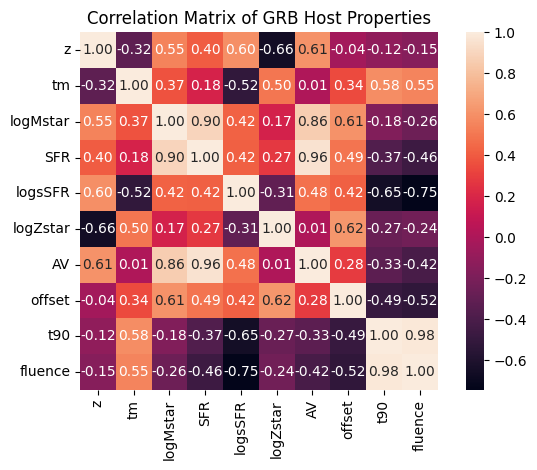

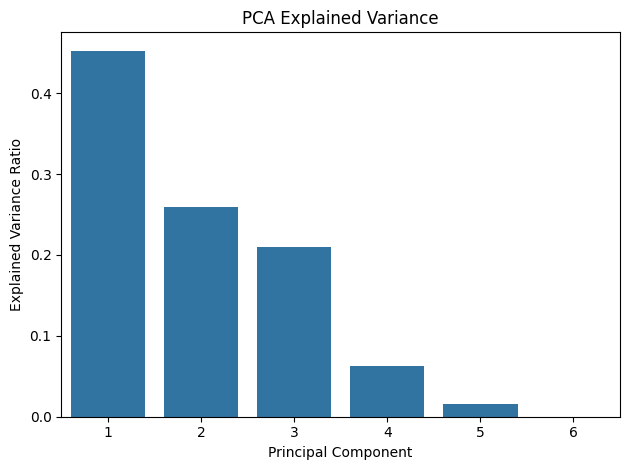

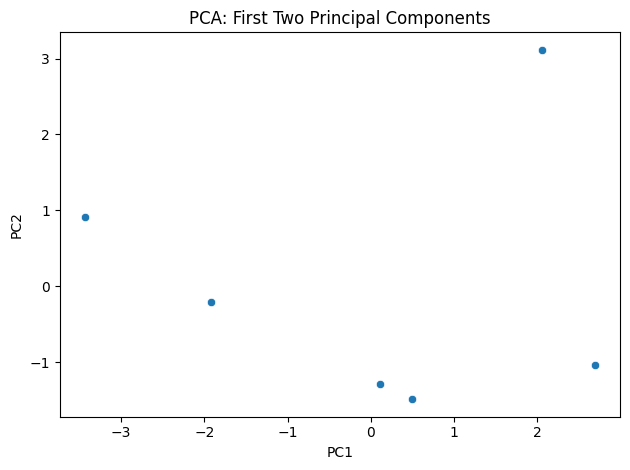

PC1: 0.453
PC2: 0.259
PC3: 0.209
PC4: 0.063
PC5: 0.016
PC6: 0.000


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_excel('all_GRB_hosts_filtered.xlsx')

# 2. Build the parameters exactly as in Nugent et al. (2022) §4
df['tm']        = df['age']                                # mass‐weighted age in Gyr
df['logMstar']  = df['mass']                               # log10(stellar mass / M_sun)
df['SFR']       = df['SFR']                                # star formation rate (M_sun/yr)
# specific SFR = SFR / M*, then log10
df['sSFR']      = df['SFR'] / (10 ** df['logMstar'])
df['logsSFR']   = np.log10(df['sSFR'].replace(0, np.nan))
df['logZstar']  = df['logzsol']                            # log(stellar metallicity / Z_sun)
# total dust attenuation A_V = 1.086 * (τV,1 + τV,2)
df['AV']        = 1.086 * (df['dust1'] + df['dust2'])
df['t90'] = df['T90']
df['fluence'] = df['fluence']
df['offset'] = df['offset_kpc']

# 3. Select only the numeric columns we care about
features = ['z', 'tm', 'logMstar', 'SFR', 'logsSFR', 'logZstar', 'AV', 'offset', 't90', 'fluence']
data = df[features].dropna()

# ---------------------------------------------------
# Part A: Correlation Matrix Heatmap
# ---------------------------------------------------

# 4. Compute the correlation matrix
corr = data.corr()

# 5. Plot it with seaborn
plt.figure()
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title('Correlation Matrix of GRB Host Properties')
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# Part B: Principal Component Analysis (PCA)
# ---------------------------------------------------

# 6. Standardize the features (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# 7. Fit PCA
pca = PCA()
pca.fit(X_scaled)

# 8. Plot the explained variance ratio
plt.figure()
sns.barplot(x=np.arange(1, len(pca.explained_variance_ratio_)+1),
            y=pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.tight_layout()
plt.show()

# 9. Project the data onto the first two principal components
X_pca = pca.transform(X_scaled)

# 10. Scatter plot of PC1 vs. PC2
plt.figure()
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First Two Principal Components')
plt.tight_layout()
plt.show()

# 11. (Optional) Print out the variance explained by each PC
for i, var in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"PC{i}: {var:.3f}")


## Hierarchical Clustering among all parameters

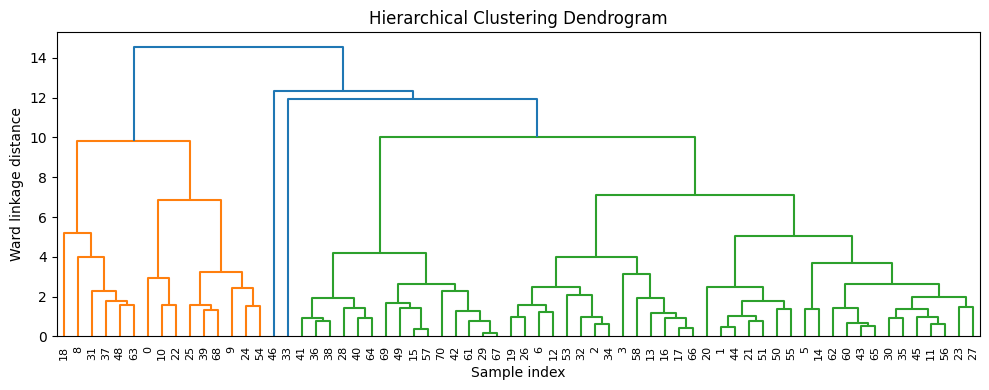

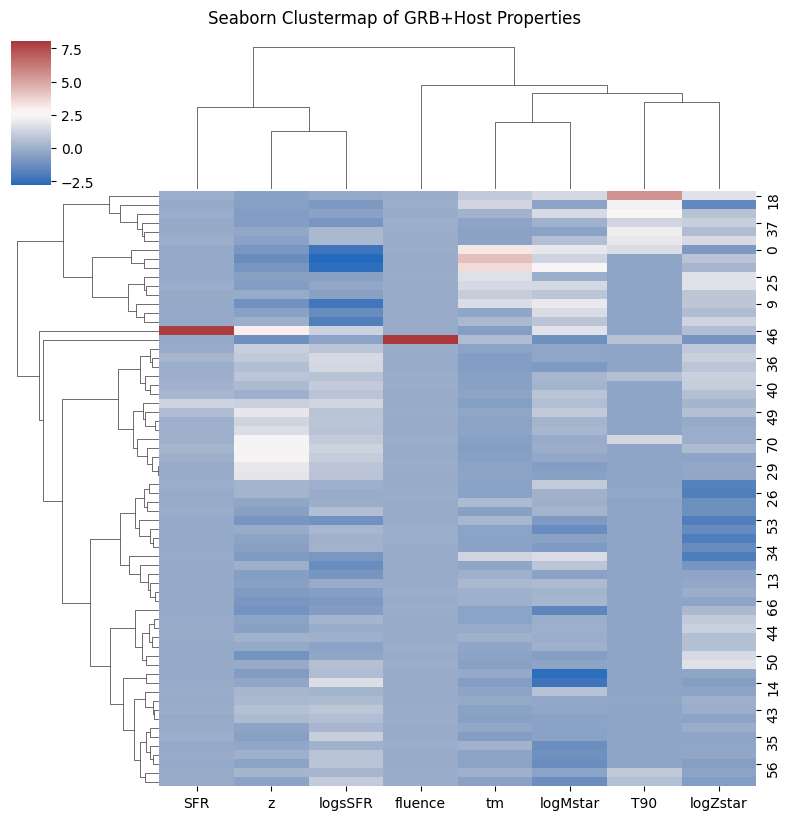

In [ ]:
'''Hierarchical Clustering among all parameters'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# 1) Load your data
df = pd.read_excel('all_GRB_hosts_filtered.xlsx')

# 2) Reconstruct the same host parameters as before:
df['tm']        = df['age']
df['logMstar']  = df['mass']
df['SFR']       = df['SFR']
df['sSFR']      = df['SFR'] / (10**df['logMstar'])
df['logsSFR']   = np.log10(df['sSFR'].replace(0, np.nan))
df['logZstar']  = df['logzsol']
df['AV']        = 1.086 * (df['dust1'] + df['dust2'])

# 3) Pick the features to cluster on:
features = [
    'T90',       # GRB duration
    'fluence',   # GRB fluence
    'z',         # host redshift
    'tm',        # host mass-weighted age
    'logMstar',  # host stellar mass
    'SFR',       # host star-formation rate
    'logsSFR',   # host specific SFR
    'logZstar',  # host metallicity
    #'AV'         # host dust attenuation
]

# 4) Subset and drop any rows with missing values
data = df[features].dropna()

# 5) Standardize each column to zero mean & unit variance
scaler = StandardScaler()
X = scaler.fit_transform(data)

# 6) Compute the hierarchical clustering linkage (Ward’s method)
link = linkage(X, method='ward')

# ---------------------------------------------------
# A) Dendrogram
# ---------------------------------------------------
plt.figure(figsize=(10, 4))
dendrogram(
    link,
    labels=data.index.astype(str),
    leaf_rotation=90,
    leaf_font_size=8,
    color_threshold=None
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Ward linkage distance')
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# B) Seaborn clustermap (heatmap + dendrogram)
# ---------------------------------------------------
# Re-create a DataFrame of the scaled data (so clustermap can annotate columns)
scaled_df = pd.DataFrame(X, index=data.index, columns=features)

# Plot
sns.clustermap(
    scaled_df,
    method='ward',         # same linkage
    metric='euclidean',
    z_score=None,
    cmap='vlag',           # divergent colormap
    figsize=(8, 8),
    standard_scale=None
)
plt.suptitle('Seaborn Clustermap of GRB+Host Properties', y=1.02)
plt.show()


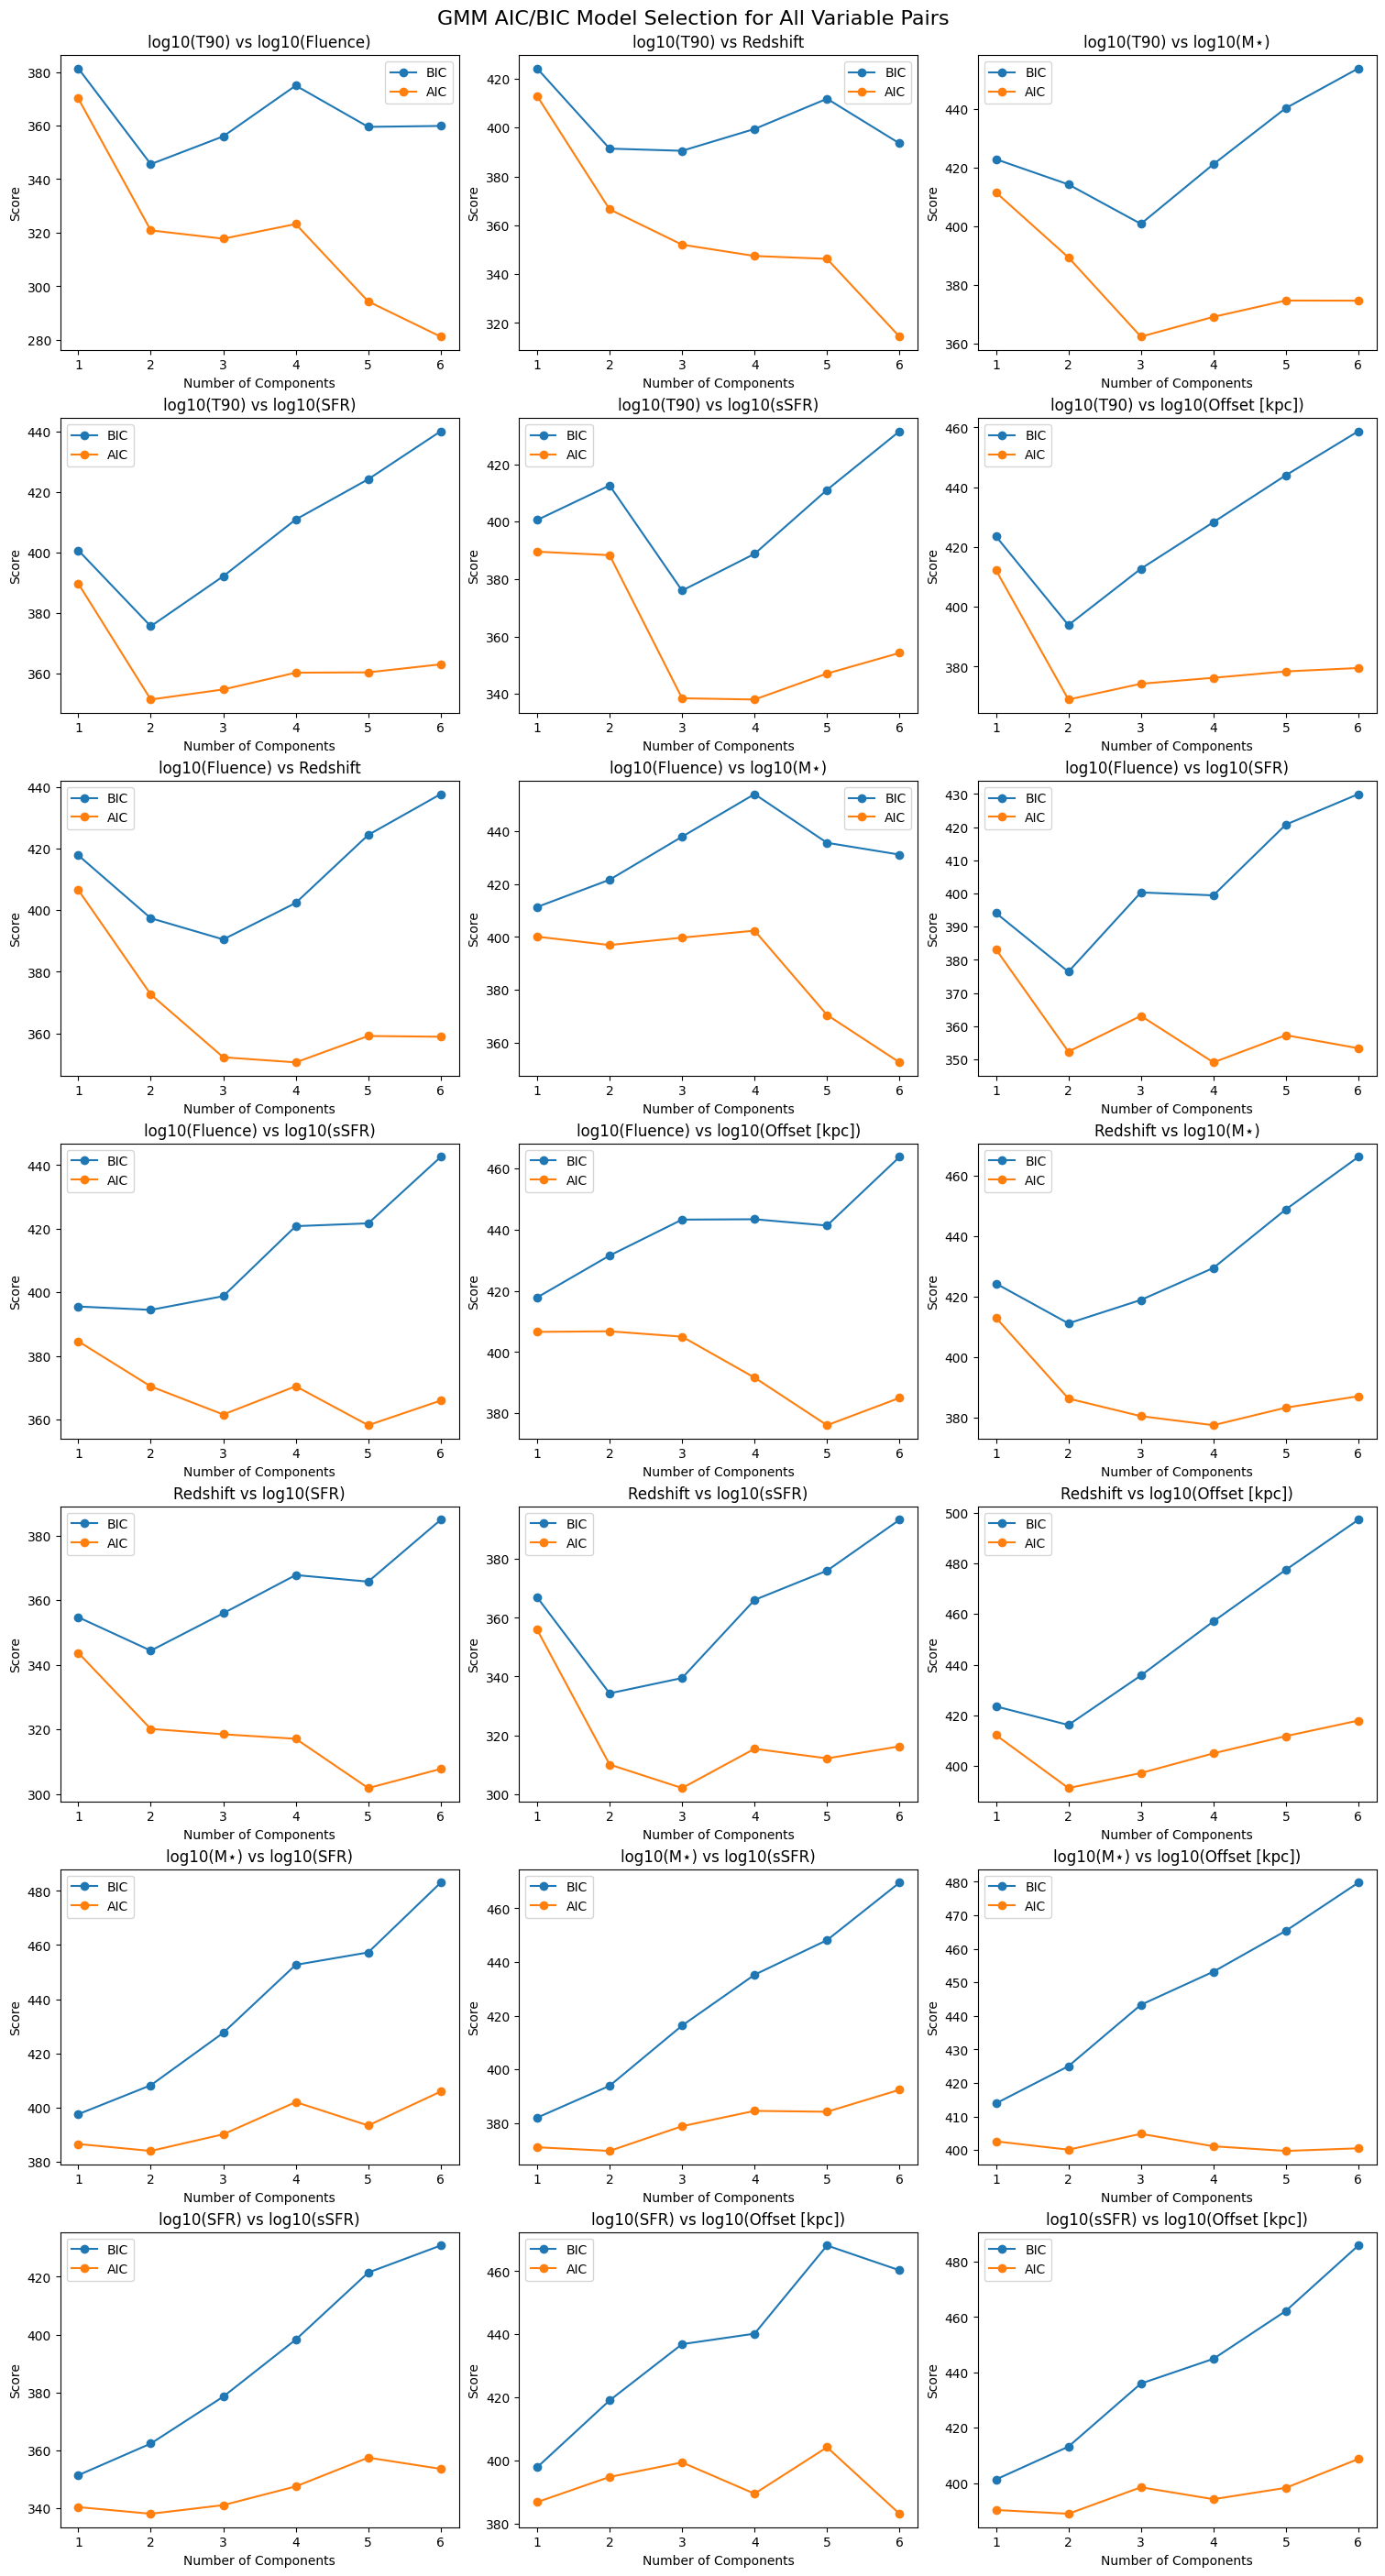

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# ----------------------------
# 1. Load your dataset
# ----------------------------
df = pd.read_excel('all_GRB_hosts_filtered.xlsx')

# ----------------------------
# 2. Define variables to use
# ----------------------------
# Make sure all these columns exist in your dataframe
df['logMstar'] = df['mass']
df['logSFR'] = np.log10(df['SFR'].replace(0, np.nan))
df['logT90'] = np.log10(df['T90'].replace(0, np.nan))
df['logFluence'] = np.log10(df['fluence'].replace(0, np.nan))
df['logOffset'] = np.log10(df['offset_kpc'].replace(0, np.nan))

variables = {
    'logT90': 'log10(T90)',
    'logFluence': 'log10(Fluence)',
    'z': 'Redshift',
    'logMstar': 'log10(M⋆)',
    'logSFR': 'log10(SFR)',
    'logsSFR': 'log10(sSFR)',
    'logOffset': 'log10(Offset [kpc])'
}

# ----------------------------
# 3. AIC/BIC analysis
# ----------------------------
max_components = 6
var_pairs = list(combinations(variables.keys(), 2))

n_cols = 3
n_rows = int(np.ceil(len(var_pairs) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows), constrained_layout=True)

for idx, (xvar, yvar) in enumerate(var_pairs):
    row, col = divmod(idx, n_cols)
    ax = axes[row, col] if n_rows > 1 else axes[col]

    # Clean data: drop NaNs and filter positive values if log-scaled
    df_clean = df[[xvar, yvar]].replace([np.inf, -np.inf], np.nan).dropna()

    if df_clean.shape[0] < max_components + 1:
        ax.set_title(f'{variables[xvar]} vs {variables[yvar]}\nNot enough data')
        ax.axis('off')
        continue

    # Standardize
    X = df_clean[[xvar, yvar]].values
    X = StandardScaler().fit_transform(X)

    # Fit GMMs with 1 to max_components
    n_range = np.arange(1, max_components + 1)
    models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_range]
    aics = [m.aic(X) for m in models]
    bics = [m.bic(X) for m in models]

    # Plot AIC and BIC
    ax.plot(n_range, bics, marker='o', label='BIC')
    ax.plot(n_range, aics, marker='o', label='AIC')
    ax.set_title(f'{variables[xvar]} vs {variables[yvar]}')
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('Score')
    ax.legend()

# Remove empty subplots if any
for j in range(idx+1, n_rows*n_cols):
    r, c = divmod(j, n_cols)
    ax = axes[r, c] if n_rows > 1 else axes[c]
    ax.axis('off')

plt.suptitle('GMM AIC/BIC Model Selection for All Variable Pairs', fontsize=16)
plt.show()


## Inferences from the above plot:
From the AIC and BIC pair-wise plots between each variable in our data shown above, we only select the pairs where we see clear
minima in the AIC/BIC and do GMM for those. The GMM plot will indicate the probability of a point in our data belonging to a specific
cluster. It can also give information about the structure of our data, based on whether the clusters are well defined or not.

From the above plots, we choose the following pairs of variables to perform GMM on:
1. logT90 vs logFluence
2. logT90 vs Redshift
3. logT90 vs logMstar
4. logT90 vs logSFR
5. logT90 vs logsSFR
6. logT90 vs logOffset
7. logFluence vs redshift
8. redshift vs logMstar
9. redshift vs logsSFR
10. redshift vs logOffset

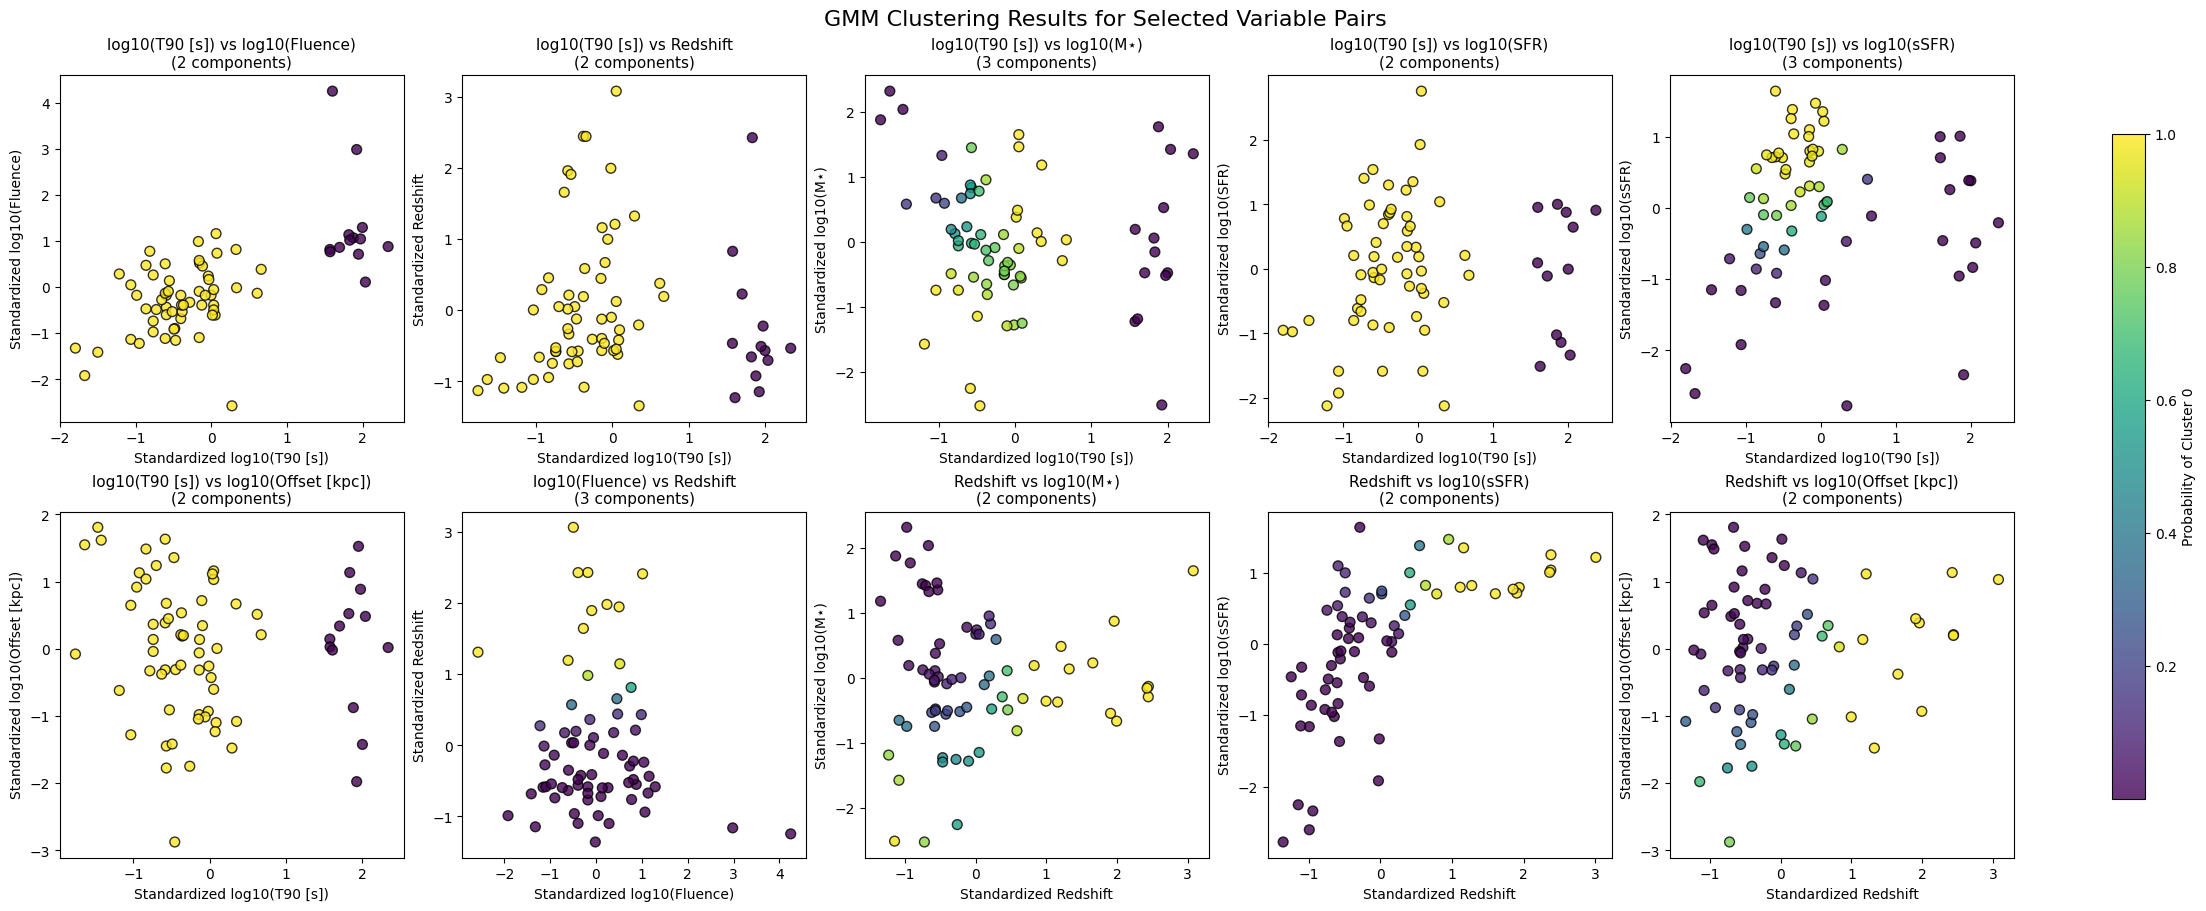

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# ----------------------------
# 1. Load your dataset
# ----------------------------
df = pd.read_excel('all_GRB_hosts_filtered.xlsx')

# ----------------------------
# 2. Create necessary transformed columns
# ----------------------------
df['logT90'] = np.log10(df['T90'].replace(0, np.nan))
df['logFluence'] = np.log10(df['fluence'].replace(0, np.nan))
df['logOffset'] = np.log10(df['offset_kpc'].replace(0, np.nan))
df['logMstar'] = df['mass']
df['logSFR'] = np.log10(df['SFR'].replace(0, np.nan))
# logsSFR is assumed to already exist in your data

# ----------------------------
# 3. Define new variable pairs and number of components
# ----------------------------
gmm_pairs = [
    ('logT90', 'logFluence', 2),
    ('logT90', 'z', 2),
    ('logT90', 'logMstar', 3),
    ('logT90', 'logSFR', 2),
    ('logT90', 'logsSFR', 3),
    ('logT90', 'logOffset', 2),
    ('logFluence', 'z', 3),
    ('z', 'logMstar', 2),
    ('z', 'logsSFR', 2), #or 3
    ('z', 'logOffset', 2)
]

label_map = {
    'logT90': 'log10(T90 [s])',
    'logFluence': 'log10(Fluence)',
    'logOffset': 'log10(Offset [kpc])',
    'logMstar': 'log10(M⋆)',
    'logSFR': 'log10(SFR)',
    'logsSFR': 'log10(sSFR)',
    'z': 'Redshift'
}

# ----------------------------
# 4. Perform GMM and plot
# ----------------------------
fig, axes = plt.subplots(2, 5, figsize=(22, 9), constrained_layout=True)

for i, (xvar, yvar, n_comp) in enumerate(gmm_pairs):
    ax = axes.flat[i]

    # Clean data
    df_clean = df[[xvar, yvar]].replace([np.inf, -np.inf], np.nan).dropna()
    if df_clean.shape[0] <= n_comp:
        ax.set_title(f"{label_map[xvar]} vs {label_map[yvar]}\nNot enough data")
        ax.axis('off')
        continue

    X = df_clean[[xvar, yvar]].values
    X_scaled = StandardScaler().fit_transform(X)

    # Fit GMM
    gmm = GaussianMixture(n_components=n_comp, covariance_type='full', random_state=0)
    gmm.fit(X_scaled)
    probs = gmm.predict_proba(X_scaled)

    # Scatter plot
    scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1],
                         c=probs[:, 0], cmap='viridis', s=50, edgecolor='k', alpha=0.8)
    ax.set_title(f'{label_map[xvar]} vs {label_map[yvar]}\n({n_comp} components)', fontsize=11)
    ax.set_xlabel(f'Standardized {label_map[xvar]}', fontsize=10)
    ax.set_ylabel(f'Standardized {label_map[yvar]}', fontsize=10)

# Shared colorbar
cbar = fig.colorbar(scatter, ax=axes.ravel().tolist(), orientation='vertical', shrink=0.85)
cbar.set_label('Probability of Cluster 0')

plt.suptitle('GMM Clustering Results for Selected Variable Pairs', fontsize=16)
plt.show()


## Inferences from the above plot:
1. t90 vs fluence: two distince clusters observed. one with low t90 and low fluence. the second cluster represents grbs with extended emission. these grbs also have higher fluence in comparison.
(compare galaxy parameters data and see if there is a trend)
2. t90 vs redshift: again two distinct clusters primarily based on t90 values. redshift distribution does not seem to vary much between both clusters.
3. t90 vs Mstar: clusters are not distinct
4. t90 vs SFR: two clusters based on t90 values probably. higher t90 value (extended) GRBs largely seem to have lower SFR values than low t90 value GRBs.
5. t90 vs sSFR: considerable transition between two clusters.
6. t90 vs offset: two distinct clusters based on t90 values. offset distribution does not seem to vary much between both clusters.
7. fluence vs redshif: two clusters based on redshift values with a thin transition band. 2 very high fluence GRBs seem to have low redshift suggesting closer distance from earth.
8. redshift vs Mstar: not distinct
9. redshift vs sSFR: two clusters based on redshift values with a small transition band. low redshift GRBs are mostly equally distributed over the sSFR values. high redshift GRBs distinctly belong to
host galaxies with higher sSFR hosts. (compare other parameters if possible)
10. redshift vs offset: two clusters based on redshift values with a slightly borad transition band.


Using columns: T90, fluence, z, mass, SFR, offset_kpc
Converting columns to numeric...
NaN counts after numeric conversion:
fluence    1
dtype: int64

Dropped 1 rows with missing values in essential columns.
70 rows remaining for analysis.

66 rows remaining after removing non-positive values.

Performing bootstrap with 1000 iterations for a 68% CI...
  log10(T90): Mean = 0.094, 68% CI = (-0.037, 0.216)
  log10(Fluence): Mean = 1.254, 68% CI = (1.168, 1.334)
  Redshift: Mean = 0.819, 68% CI = (0.746, 0.890)
  log10(M⋆): Mean = 0.986, 68% CI = (0.982, 0.990)
  log10(SFR): Mean = 0.199, 68% CI = (0.085, 0.299)
  log10(sSFR): Mean = -0.787, 68% CI = (-0.901, -0.667)
  log10(Offset [kpc]): Mean = 0.916, 68% CI = (0.851, 0.977)

Generating 7-panel plot...


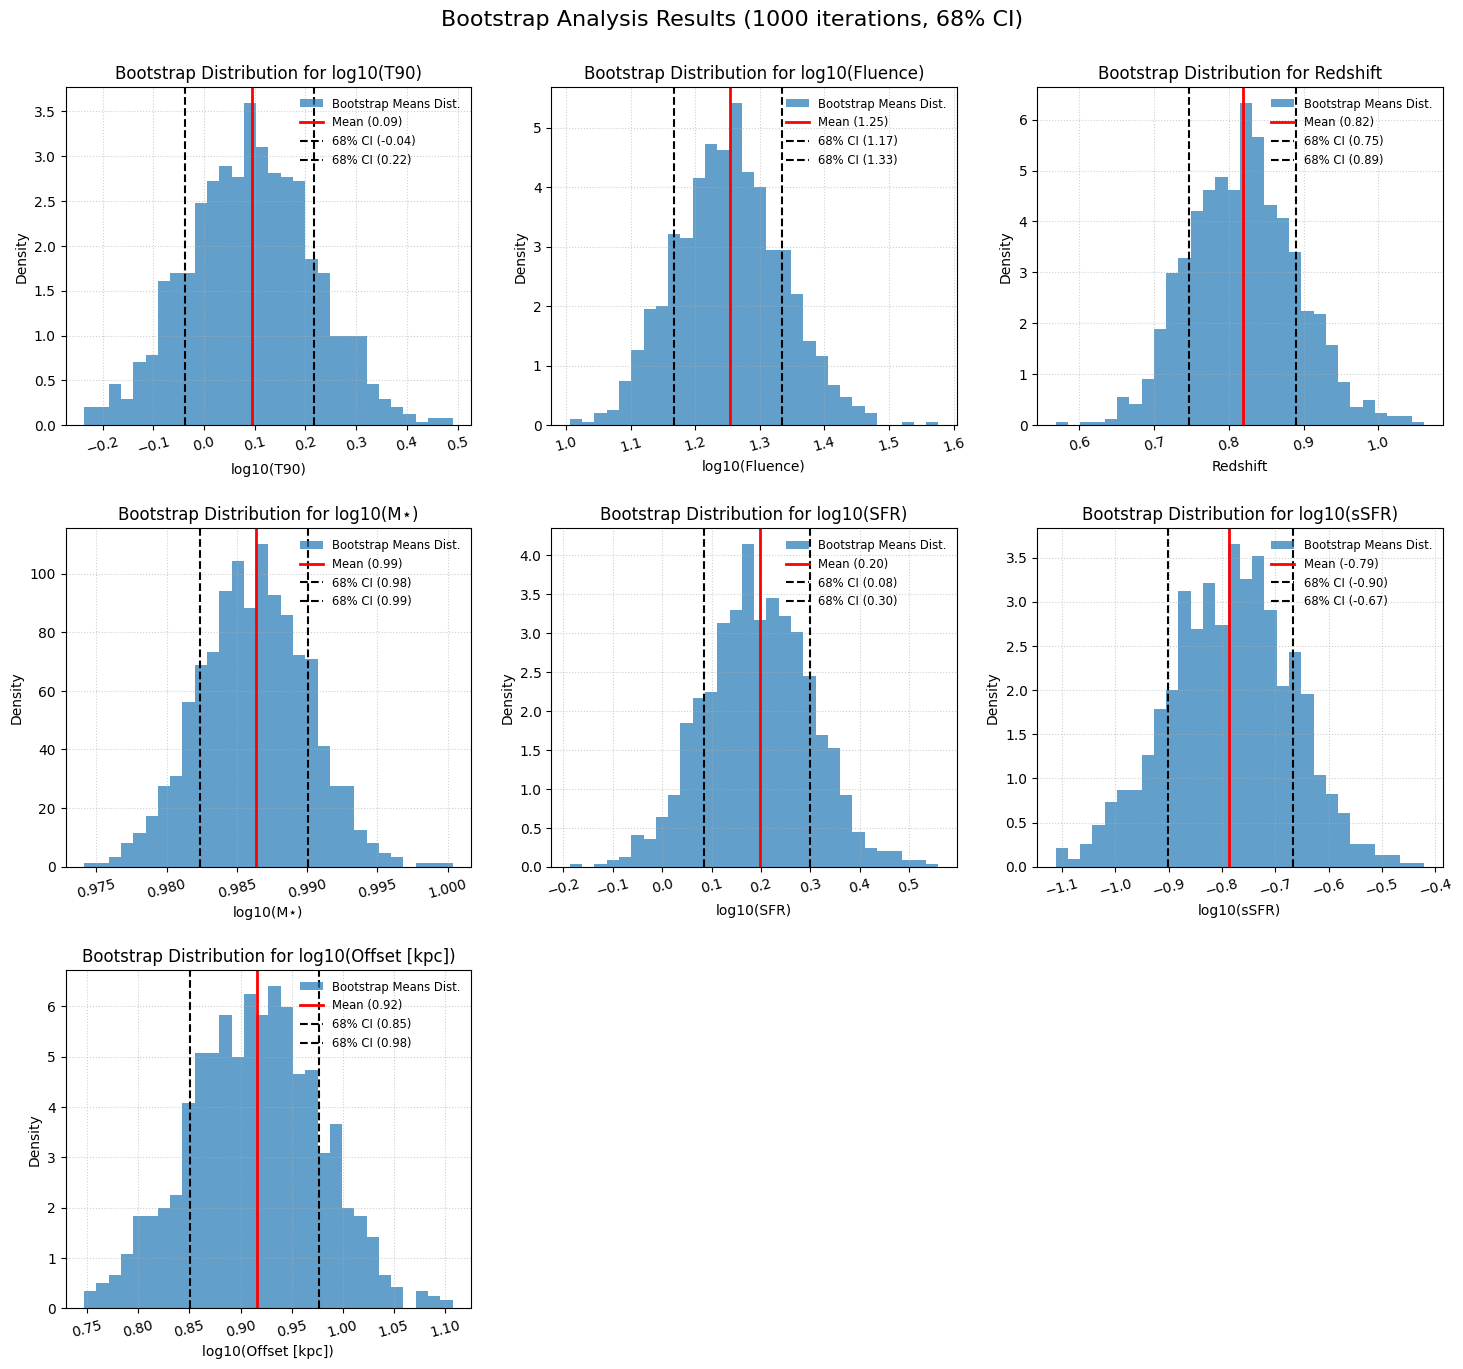

Plot generation complete.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm # For potential alternative CI calculation, though percentiles are used here

# 1. Load Data
# Ensure 'all_GRB_hosts_filtered.csv' is uploaded to your Colab environment
try:
    df = pd.read_csv('/content/all_GRB_hosts_filtered.csv')

except FileNotFoundError:
    print("Error: 'all_GRB_hosts_filtered.csv' not found.")
    print("Please upload the file to your Colab environment and try again.")
    # Stop execution if file not found
    exit()

# 2. Filter for Short GRBs
# Check if 'type_GRB' column exists and filter
if 'type_GRB' in df.columns:
    original_count = len(df)
    df = df[df['type_GRB'].str.lower() == 'short'].copy()

else:
    print("Warning: 'type_GRB' column not found. Assuming all entries are Short GRBs.")

# 3. Select and Prepare Columns
cols_to_use = ['T90', 'fluence', 'z', 'mass', 'SFR', 'offset_kpc']
print(f"\nUsing columns: {', '.join(cols_to_use)}")

# Ensure all required columns exist
missing_cols = [col for col in cols_to_use if col not in df.columns]
if missing_cols:
    print(f"Error: The following required columns are missing from the CSV: {', '.join(missing_cols)}")
    exit()

df_analysis = df[cols_to_use].copy()

# Convert to numeric, coercing errors to NaN
print("Converting columns to numeric...")
for col in cols_to_use:
    df_analysis[col] = pd.to_numeric(df_analysis[col], errors='coerce')

# Report initial NaNs created by coercion
nan_counts = df_analysis.isna().sum()
print("NaN counts after numeric conversion:")
print(nan_counts[nan_counts > 0])

# Drop rows with NaN in any of the essential columns
initial_rows = len(df_analysis)
df_analysis.dropna(subset=cols_to_use, inplace=True)
print(f"\nDropped {initial_rows - len(df_analysis)} rows with missing values in essential columns.")
print(f"{len(df_analysis)} rows remaining for analysis.")

# Filter out non-positive values required for logs
cols_for_log = ['T90', 'fluence', 'mass', 'SFR', 'offset_kpc']
non_positive_mask = pd.Series(False, index=df_analysis.index)
for col in cols_for_log:
      non_positive_mask |= (df_analysis[col] <= 0)

if non_positive_mask.any():
    print(f"\nWarning: Removing {non_positive_mask.sum()} rows with non-positive values in columns needed for log transformation ({', '.join(cols_for_log)}).")
    df_analysis = df_analysis[~non_positive_mask]
    print(f"{len(df_analysis)} rows remaining after removing non-positive values.")

# Check if data remains
if df_analysis.empty:
    print("\nError: No valid data remaining after cleaning and filtering. Cannot proceed.")
    exit()

# 4. Calculate derived and log variables

# Calculate sSFR = SFR / mass
df_analysis['sSFR'] = df_analysis['SFR'] / df_analysis['mass']

# Calculate log10 variables
df_analysis['logT90'] = np.log10(df_analysis['T90'])
df_analysis['logFluence'] = np.log10(df_analysis['fluence'])
df_analysis['logMstar'] = np.log10(df_analysis['mass'])
df_analysis['logSFR'] = np.log10(df_analysis['SFR'])
# Add small epsilon before log for sSFR if necessary, though filtering mass/SFR > 0 should prevent issues
# Handle cases where sSFR might become zero or negative if mass/SFR were allowed to be zero/negative (already filtered).
df_analysis['logsSFR'] = np.log10(df_analysis['sSFR'])
df_analysis['logOffset'] = np.log10(df_analysis['offset_kpc'])


# Variables to bootstrap and their plot labels
variables = {
    'logT90': 'log10(T90)',
    'logFluence': 'log10(Fluence)',
    'z': 'Redshift',
    'logMstar': 'log10(M⋆)',
    'logSFR': 'log10(SFR)',
    'logsSFR': 'log10(sSFR)',
    'logOffset': 'log10(Offset [kpc])'
}
data_to_bootstrap = df_analysis[variables.keys()].copy()

# 5. Bootstrap Function
def bootstrap_mean_ci(data, n_iterations=1000, ci=68):
    """Calculates the bootstrap mean and confidence interval using percentiles."""
    # Ensure data is a NumPy array for efficient processing
    data = np.asarray(data)
    n_samples = len(data)

    # Check if data is sufficient
    if n_samples < 2:
        return np.nan, np.nan, np.nan, np.array([])

    bootstrap_means = np.zeros(n_iterations)

    # Generate all random indices at once for potential speedup
    random_indices = np.random.randint(0, n_samples, size=(n_iterations, n_samples))

    # Calculate means for each bootstrap sample
    bootstrap_samples = data[random_indices]
    bootstrap_means = np.mean(bootstrap_samples, axis=1)

    original_mean = np.mean(data)

    # Calculate confidence interval using percentiles
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile

    ci_lower = np.percentile(bootstrap_means, lower_percentile)
    ci_upper = np.percentile(bootstrap_means, upper_percentile)

    return original_mean, ci_lower, ci_upper, bootstrap_means

# 6. Apply Bootstrap
bootstrap_results = {}
n_iterations = 1000
confidence_level = 68

print(f"\nPerforming bootstrap with {n_iterations} iterations for a {confidence_level}% CI...")

for var_key, var_label in variables.items():
    data_array = data_to_bootstrap[var_key].values
    if len(data_array) > 1:
        mean, ci_low, ci_up, means_dist = bootstrap_mean_ci(
            data_array,
            n_iterations=n_iterations,
            ci=confidence_level
        )
        bootstrap_results[var_key] = {
            'mean': mean,
            'ci_lower': ci_low,
            'ci_upper': ci_up,
            'distribution': means_dist,
            'label': var_label # Store label for plotting
        }
        print(f"  {var_label}: Mean = {mean:.3f}, {confidence_level}% CI = ({ci_low:.3f}, {ci_up:.3f})")
    else:
         print(f"  Skipping {var_label}: Not enough data points ({len(data_array)}).")
         bootstrap_results[var_key] = None # Mark as skipped

# 7. Generate Multipanel Plot
valid_results = {k: v for k, v in bootstrap_results.items() if v is not None}
num_vars_to_plot = len(valid_results)

if num_vars_to_plot > 0:
    print(f"\nGenerating {num_vars_to_plot}-panel plot...")
    # Determine grid size (aim for ~3 columns)
    n_cols = min(3, num_vars_to_plot)
    n_rows = (num_vars_to_plot + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4.5), squeeze=False)
    axes = axes.flatten() # Flatten to easily iterate

    plot_idx = 0
    for var_key, results in valid_results.items():
        ax = axes[plot_idx]
        label = results['label']

        # Plot histogram of bootstrap means
        ax.hist(results['distribution'], bins=30, density=True, alpha=0.7, label='Bootstrap Means Dist.')

        # Add lines for original mean and CI
        ax.axvline(results['mean'], color='red', linestyle='-', linewidth=2, label=f'Mean ({results["mean"]:.2f})')
        ax.axvline(results['ci_lower'], color='black', linestyle='--', linewidth=1.5, label=f'{confidence_level}% CI ({results["ci_lower"]:.2f})')
        ax.axvline(results['ci_upper'], color='black', linestyle='--', linewidth=1.5, label=f'{confidence_level}% CI ({results["ci_upper"]:.2f})')

        ax.set_title(f'Bootstrap Distribution for {label}')
        ax.set_xlabel(label)
        ax.set_ylabel('Density')
        ax.legend(fontsize='small', frameon=False)
        ax.tick_params(axis='x', rotation=15) # Slightly rotate x-ticks if labels are long
        ax.grid(True, linestyle=':', alpha=0.6)

        plot_idx += 1

    # Hide any unused subplots
    for i in range(plot_idx, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout(pad=2.0) # Add padding between plots
    plt.suptitle(f'Bootstrap Analysis Results ({n_iterations} iterations, {confidence_level}% CI)', y=1.02, fontsize=16) # Add overall title
    plt.show()
    print("Plot generation complete.")
else:
    print("\nNo variables had sufficient data after filtering to generate plots.")


## Inferences from the above plot:
###Plot 1: log10(T90) Distribution:

The distribution is roughly symmetric around the mean.
Most Short GRBs in the sample have durations between 1.07-1.66 seconds (10^0.03 to 10^0.22).
whiConfirms these are genuine short GRBs (T90 < 2 seconds)
Narrow CI indicates consistent duration measurements

###Plot 1:log10(Fluence) Distribution:

Well-defined symmetric distribution
Relatively narrow confidence interval
Most SGRBs have fluence between 15.14-21.38 units (10^1.18 to 10^1.33)
Shows consistency in energy output measurements

###Plot 3: Redshift Distribution:

Slightly right-skewed distribution.
Most SGRBs detected at redshifts between 0.74-0.89.
Selection effect: harder to detect and measure redshifts for more distant events.

###Plot 4: log10(M⋆) Distribution:

Very narrow distribution and
extremely tight confidence interval.
Host galaxies have consistent stellar masses.
Suggests Short GRBs occur in massive galaxies (~10^10 solar masses).

###Plot 5: log10(SFR) Distribution:

Moderately wide distribution.
Shows variety in host galaxy star formation activity.
Most hosts have SFR between 1.23-2.04 solar masses/year.
Indicates SGRBs occur in both star-forming and relatively quiescent galaxies.

###Plot 6: log10(sSFR) Distribution:

Relatively broad distribution.
Lower sSFR values indicate older stellar populations.
It is consistent with delayed time distribution expected for neutron star mergers.


###Plot 7: log10(Offset) Distribution:

Slightly right-skewed distribution.
Large offsets (7.08-9.55 kpc) from host galaxy centers.
Consistent with binary neutron star merger scenario.



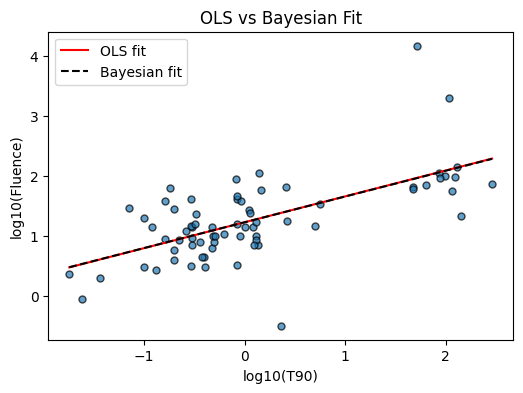

OLS    → RMSE = 0.525, R² = 0.412
Bayes  → RMSE = 0.525, R² = 0.412


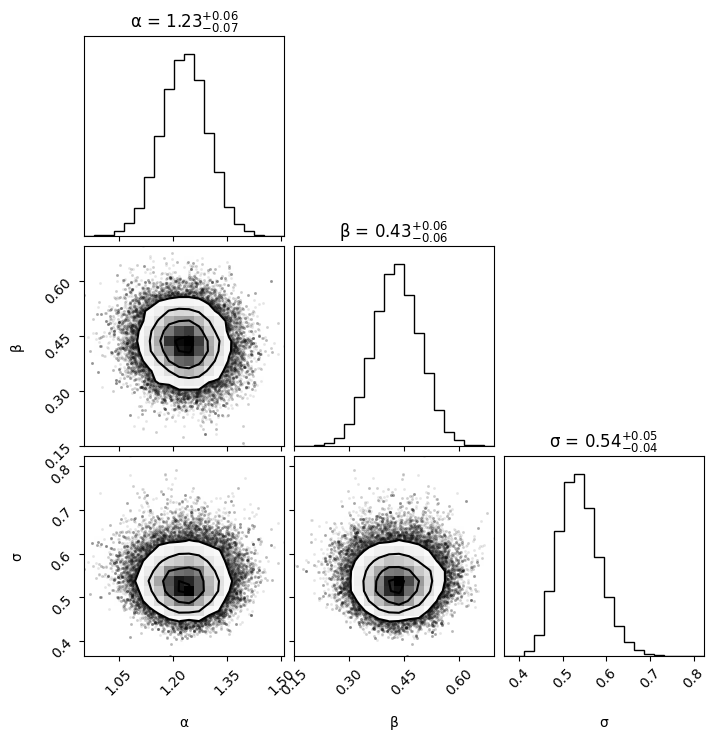

In [ ]:
# Combined OLS + Bayesian (emcee) fit for log10(T90) vs log10(Fluence)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import emcee
import corner
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare data
df = pd.read_excel('all_GRB_hosts_filtered.xlsx')
df = df[['T90','fluence']].dropna()
df = df[(df['T90'] > 0) & (df['fluence'] > 0)]
x = np.log10(df['T90'].values)
y = np.log10(df['fluence'].values)

# OLS fit
X = sm.add_constant(x)
ols_result = sm.OLS(y, X).fit()
alpha_ols, beta_ols = ols_result.params
sigma_ols = np.sqrt(ols_result.scale)

# Bayesian model
def log_prior(theta):
    alpha, beta, sigma = theta
    if sigma <= 0:
        return -np.inf
    return -np.log(sigma)

def log_likelihood(theta, x, y):
    alpha, beta, sigma = theta
    model = alpha + beta * x
    return -0.5 * np.sum(np.log(2*np.pi*sigma**2) + ((y - model)**2) / sigma**2)

def log_posterior(theta, x, y):
    lp = log_prior(theta)
    return lp + log_likelihood(theta, x, y) if np.isfinite(lp) else -np.inf

ndim, nwalkers = 3, 50
p0 = np.array([alpha_ols, beta_ols, sigma_ols]) + 1e-4 * np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y))
sampler.run_mcmc(p0, 2000, progress=False)

# Extract posterior
samples = sampler.get_chain(discard=500, flat=True)
alpha_bayes, beta_bayes, sigma_bayes = samples.T
alpha_mean, beta_mean = alpha_bayes.mean(), beta_bayes.mean()

# Plot with Bayesian fit

xx = np.linspace(x.min(), x.max(), 100)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=25, edgecolor='k', alpha=0.7)

plt.plot(xx, alpha_ols + beta_ols*xx, 'r-', label='OLS fit')
plt.plot(xx, alpha_mean + beta_mean*xx, 'k--', label='Bayesian fit')
plt.xlabel('log10(T90)'); plt.ylabel('log10(Fluence)')
plt.title('OLS vs Bayesian Fit')
plt.legend(); plt.show()

# Corner plot
corner.corner(samples, labels=["α", "β", "σ"], show_titles=True);

# Compare fit statistics
y_pred_ols = alpha_ols + beta_ols * x
y_pred_bayes = alpha_mean + beta_mean * x
print(f"OLS    → RMSE = {np.sqrt(mean_squared_error(y, y_pred_ols)):.3f}, R² = {r2_score(y, y_pred_ols):.3f}")
print(f"Bayes  → RMSE = {np.sqrt(mean_squared_error(y, y_pred_bayes)):.3f}, R² = {r2_score(y, y_pred_bayes):.3f}")


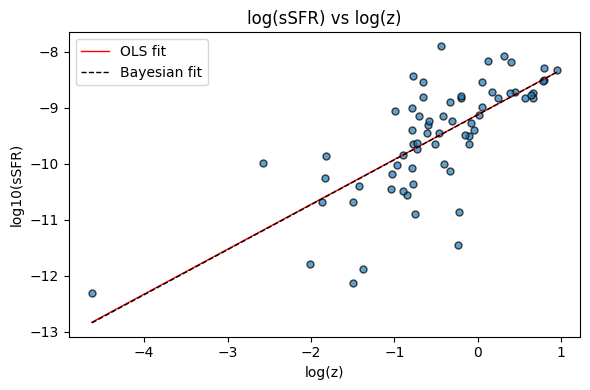

OLS    → RMSE = 0.69504179, R² = 0.51586690
Bayes  → RMSE = 0.69505535, R² = 0.51584799


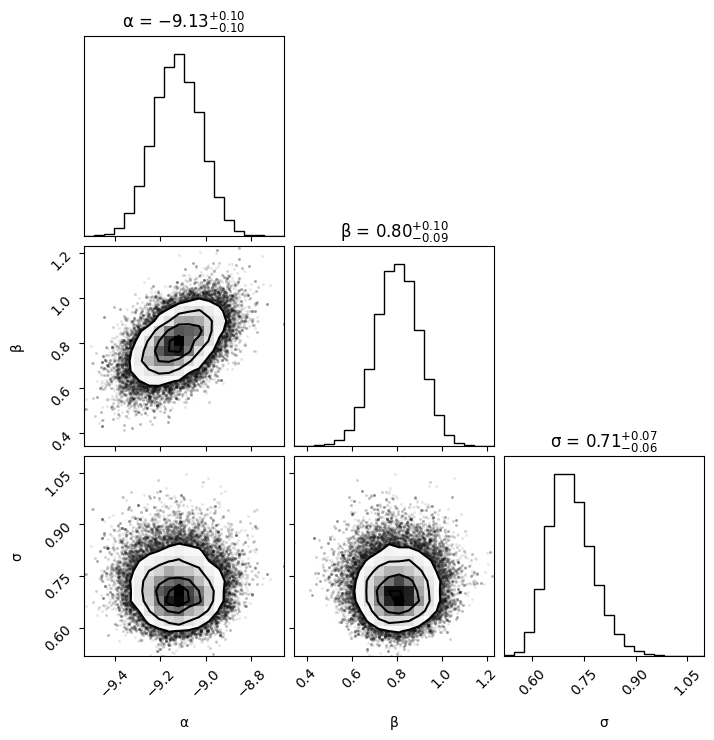

In [ ]:
#log(sSFR) vs log(z) MLE and Bayesian


df = pd.read_excel('all_GRB_hosts_filtered.xlsx')
df = df[['z', 'logMstar', 'SFR']].dropna()
df = df[df['z'] > 0]  # log(z) needs z > 0

# Compute sSFR and filter out non-positive values
df['sSFR'] = df['SFR'] / (10 ** df['logMstar'])
df = df[df['sSFR'] > 0]  # remove 0 or negative sSFR

# Use log-log model
x = np.log(df['z'].values)  # log(z)
y = np.log10(df['sSFR'].values)  # log10(sSFR)


# OLS fit
X = sm.add_constant(x)
ols_result = sm.OLS(y, X).fit()
alpha_ols, beta_ols = ols_result.params
sigma_ols = np.sqrt(ols_result.scale)

# Bayesian model
def log_prior(theta):
    alpha, beta, sigma = theta
    if sigma <= 0:
        return -np.inf
    return -np.log(sigma)

def log_likelihood(theta, x, y):
    alpha, beta, sigma = theta
    model = alpha + beta * x
    return -0.5 * np.sum(np.log(2*np.pi*sigma**2) + ((y - model)**2) / sigma**2)

def log_posterior(theta, x, y):
    lp = log_prior(theta)
    return lp + log_likelihood(theta, x, y) if np.isfinite(lp) else -np.inf

# MCMC
ndim, nwalkers = 3, 50
p0 = np.array([alpha_ols, beta_ols, sigma_ols]) + 1e-4 * np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y))
sampler.run_mcmc(p0, 2000, progress=False)

# Posterior results
samples = sampler.get_chain(discard=500, flat=True)
alpha_bayes, beta_bayes, sigma_bayes = samples.T
alpha_mean, beta_mean = alpha_bayes.mean(), beta_bayes.mean()

# Plot
xx = np.linspace(x.min(), x.max(), 100)
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=25, edgecolor='k', alpha=0.7)
plt.plot(xx, alpha_ols + beta_ols * xx, 'r-', label='OLS fit', linewidth=1)
plt.plot(xx, alpha_mean + beta_mean * xx, 'k--', label='Bayesian fit', linewidth=1)
plt.xlabel('log(z)')
plt.ylabel('log10(sSFR)')
plt.title('log(sSFR) vs log(z)')
plt.legend()
plt.tight_layout()
plt.show()

# Corner plot
corner.corner(samples, labels=["α", "β", "σ"], show_titles=True)

# Fit stats
y_pred_ols = alpha_ols + beta_ols * x
y_pred_bayes = alpha_mean + beta_mean * x
print(f"OLS    → RMSE = {np.sqrt(mean_squared_error(y, y_pred_ols)):.8f}, R² = {r2_score(y, y_pred_ols):.8f}")
print(f"Bayes  → RMSE = {np.sqrt(mean_squared_error(y, y_pred_bayes)):.8f}, R² = {r2_score(y, y_pred_bayes):.8f}")


100%|██████████| 2000/2000 [00:05<00:00, 348.01it/s]


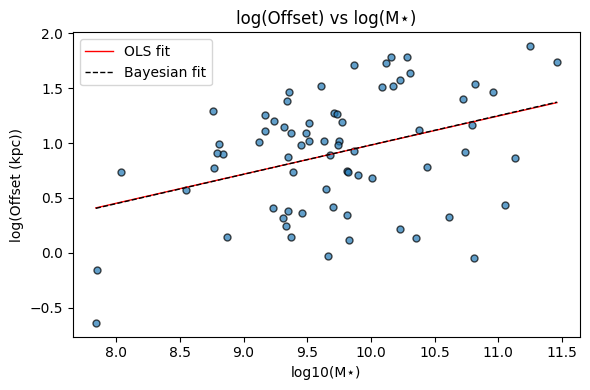

OLS    → RMSE = 0.500095, R² = 0.136007
Bayes  → RMSE = 0.500098, R² = 0.135997


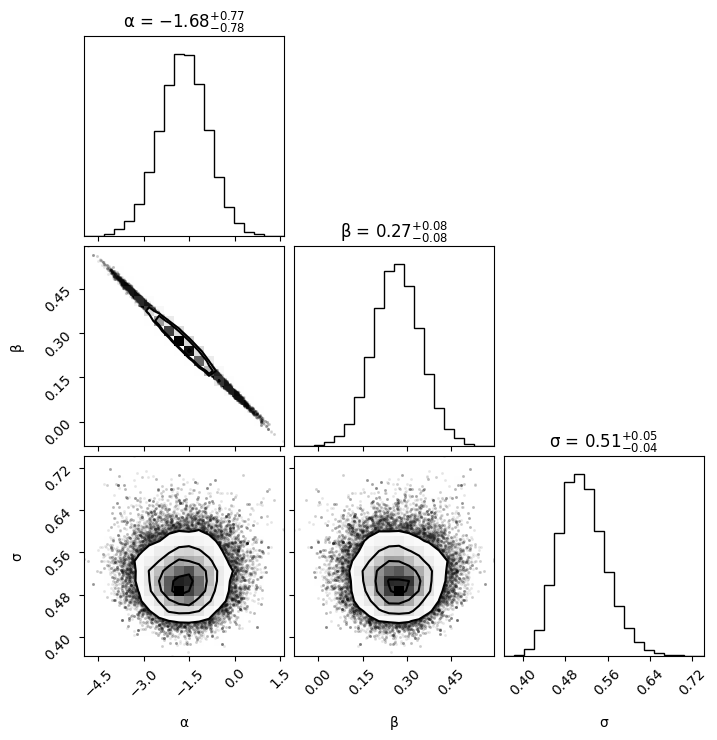

In [ ]:
#log(Mstar) and log(offset)

# Load and clean data
df = pd.read_excel('all_GRB_hosts_filtered.xlsx')
df = df[['logMstar', 'offset_kpc']].dropna()

x = df['logMstar'].values
y = np.log10(df['offset_kpc'].values)

# OLS fit
X = sm.add_constant(x)
ols_result = sm.OLS(y, X).fit()
alpha_ols, beta_ols = ols_result.params
sigma_ols = np.sqrt(ols_result.scale)

# Bayesian model
def log_prior(theta):
    alpha, beta, sigma = theta
    if sigma <= 0:
        return -np.inf
    return -np.log(sigma)

def log_likelihood(theta, x, y):
    alpha, beta, sigma = theta
    model = alpha + beta * x
    return -0.5 * np.sum(np.log(2*np.pi*sigma**2) + ((y - model)**2) / sigma**2)

def log_posterior(theta, x, y):
    lp = log_prior(theta)
    return lp + log_likelihood(theta, x, y) if np.isfinite(lp) else -np.inf

# MCMC
ndim, nwalkers = 3, 50
p0 = np.array([alpha_ols, beta_ols, sigma_ols]) + 1e-4 * np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y))
sampler.run_mcmc(p0, 2000, progress=True)

# Posterior results
samples = sampler.get_chain(discard=500, flat=True)
alpha_bayes, beta_bayes, sigma_bayes = samples.T
alpha_mean, beta_mean = alpha_bayes.mean(), beta_bayes.mean()

# Plot
xx = np.linspace(x.min(), x.max(), 100)
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=25, edgecolor='k', alpha=0.7)
plt.plot(xx, alpha_ols + beta_ols * xx, 'r-', label='OLS fit', linewidth=1)
plt.plot(xx, alpha_mean + beta_mean * xx, 'k--', label='Bayesian fit', linewidth=1)
plt.xlabel('log10(M⋆)')
plt.ylabel('log(Offset (kpc))')
plt.title('log(Offset) vs log(M⋆)')
plt.legend()
plt.tight_layout()
plt.show()

# Corner plot
corner.corner(samples, labels=["α", "β", "σ"], show_titles=True)

# Fit stats
y_pred_ols = alpha_ols + beta_ols * x
y_pred_bayes = alpha_mean + beta_mean * x
print(f"OLS    → RMSE = {np.sqrt(mean_squared_error(y, y_pred_ols)):.6f}, R² = {r2_score(y, y_pred_ols):.6f}")
print(f"Bayes  → RMSE = {np.sqrt(mean_squared_error(y, y_pred_bayes)):.6f}, R² = {r2_score(y, y_pred_bayes):.6f}")
